# A Data Programming Project Midterm

## Death Due to Air Pollution Exploratory Analysis

### A.Introduction and objective

I have decided to do a exploratory analysis on the topic 'death due to air pollution' in the world.<p>According to new data from the World Health Organization (WHO)Air pollution accounts for 1 in 8 deaths worldwide - approximately 7 million deaths in 2012. The findings, released in late March, doubled previous estimates from just 
a few years ago in 2008. WHO now characterizes air pollution as “the world’s largest single environmental health risk.”
</p>
<p>The objectives of this analysis are:
<ul>
    <li>To understand how the death rate has increased or decreased over the years.</li>
    <li>To understand which type of pollution caused most number of death rate over the years. </li>
    <li>To analyse how many people died due to air pollution from different countries. </li>
    <li>To identify the cause of increase or decrease of death rate over the years.</li>
</ul>


### B. About The Datasets Used

The dataset (CSV file) has been taken from ourworldindata which is available for public view in collbaration with WHO(world Health Organization).

The two most widely cited, and regularly updated estimates for the death toll from air pollution come from the World Health Organization (WHO) and the IHME’s Global Burden of Disease study. Their latest estimates are very close to each other – they estimate 7 million and 6.7 million deaths per year, respectively. These deaths are attributed to both indoor and outdoor pollution and – as explained below – stem from man-made and natural sources of air pollution.

The CSV file has information on the death rates for all countries in the world for the period 1990-2017. The death rate reports are divided into four main categories:overall death rate caused by air pollution,death rate caused by indoor pollution,death rate caused outdoor particulate matter and death rate caused by ozone outdoor pollution. This will make the analysis much more easir and efficient.

### C. Project Background

There has been an increase in death rate over the past few years due to air pollution.
You will notice that the WHO estimates the total death toll to be lower than the sum of indoor and outdoor pollution deaths. This is because the deaths from risk factors are not summable. As the authors explain: “Some deaths may be attributed to more than one risk factor at the same time. For example, both smoking and ambient air pollution affect lung cancer. Some lung cancer deaths could have been averted by improving ambient air quality, or by reducing tobacco smoking.”4 Similarly the death of a particular person could have been averted by reducing the indoor or outdoor air pollution.
In this context it is important to know that indoor air pollution – caused by people living in energy poverty – is one of the largest contributors to outdoor air pollution. The pollution generated in their homes also creates pollution outside the home. This means that these same populations often suffer from both, high indoor and high outdoor air pollution.
I would like to develop comparison analysis on how each year there has been an increase or decrease of death rates due to air pollutionion, try to examine what factor has caused the death rates. This could aid me to assess my objectives by knowing what we can learn from the past years and try to take measurements to reduce air pollution and death rates and save the future generation.


### D.Data Analysis

In [211]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [212]:
# Importing libraries 
import requests 
import time
import bs4
from bs4 import BeautifulSoup 
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sb
import nltk
from nltk.tokenize import word_tokenize
import numpy as np 
import re
import matplotlib.pyplot as plt
from re import sub
import csv
import requests

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

## D.1 Analysis of CSV Dataset

In [165]:
DeathData = pd.read_csv("death-rates-from-air-pollution.csv") #3116

In [166]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',100)

In [167]:
#To display the complete data from the csv file
DeathData.head(2000)

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442e+00
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960e+00
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822e+00
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266e+00
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922e+00
5,Afghanistan,AFG,1995,288.014224,239.906599,45.367141,5.739174e+00
6,Afghanistan,AFG,1996,286.642589,238.512050,45.383591,5.747050e+00
7,Afghanistan,AFG,1997,286.447455,238.113520,45.585062,5.755509e+00
8,Afghanistan,AFG,1998,286.265202,238.680150,44.837490,5.758545e+00
9,Afghanistan,AFG,1999,286.636018,238.539294,45.325501,5.793573e+00


In [168]:
DeathData.describe()

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,87.804083,50.481504,35.114982,3.370793
std,8.078372,57.845436,58.722565,18.207369,4.325445
min,1990.000000,8.401696,0.003859,7.542899,0.000000
25%,1996.750000,41.016114,2.002779,21.955108,1.302905
50%,2003.500000,72.653557,23.737851,30.977196,2.338684
75%,2010.250000,127.607177,90.138777,44.604181,3.515409
max,2017.000000,318.463253,293.509187,132.815726,37.356034


In [169]:
# To check data type in the csv file
DeathData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           6468 non-null   object 
 1   Code                                             5488 non-null   object 
 2   Year                                             6468 non-null   int64  
 3   Air pollution (total) (deaths per 100,000)       6468 non-null   float64
 4   Indoor air pollution (deaths per 100,000)        6468 non-null   float64
 5   Outdoor particulate matter (deaths per 100,000)  6468 non-null   float64
 6   Outdoor ozone pollution (deaths per 100,000)     6468 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 353.8+ KB


In [170]:
# Countries that I will be analysing
countries = DeathData["Entity"]
countries_refined = countries.drop_duplicates()
countries_refined.head(50)

0                                            Afghanistan
28                                               Albania
56                                               Algeria
84                                        American Samoa
112                                 Andean Latin America
140                                              Andorra
168                                               Angola
196                                  Antigua and Barbuda
224                                            Argentina
252                                              Armenia
280                                          Australasia
308                                            Australia
336                                              Austria
364                                           Azerbaijan
392                                              Bahamas
420                                              Bahrain
448                                           Bangladesh
476                            

In [171]:
# Total years of data we have
years = DeathData["Year"]
years_refined = years.drop_duplicates()
years_refined.head(2000)

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
24    2014
25    2015
26    2016
27    2017
Name: Year, dtype: int64

In [172]:
# Check for missing values
DeathData.isnull().sum()

Entity                                               0
Code                                               980
Year                                                 0
Air pollution (total) (deaths per 100,000)           0
Indoor air pollution (deaths per 100,000)            0
Outdoor particulate matter (deaths per 100,000)      0
Outdoor ozone pollution (deaths per 100,000)         0
dtype: int64

### Our analysis becomes easier as we now know that the datafields from the csv file do not include any null values

### Interconnection between Features

In [173]:
dat = DeathData.corr()
dat

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
Year,1.000000,-0.225142,-0.185118,-0.106214,-0.097299
"Air pollution (total) (deaths per 100,000)",-0.225142,1.000000,0.946052,0.090381,0.343790
"Indoor air pollution (deaths per 100,000)",-0.185118,0.946052,1.000000,-0.234796,0.204537
"Outdoor particulate matter (deaths per 100,000)",-0.106214,0.090381,-0.234796,1.000000,0.295962
"Outdoor ozone pollution (deaths per 100,000)",-0.097299,0.343790,0.204537,0.295962,1.000000


### It is challenging to interpret the matrix, we will use a heatmap to visualize the correlation between the features.

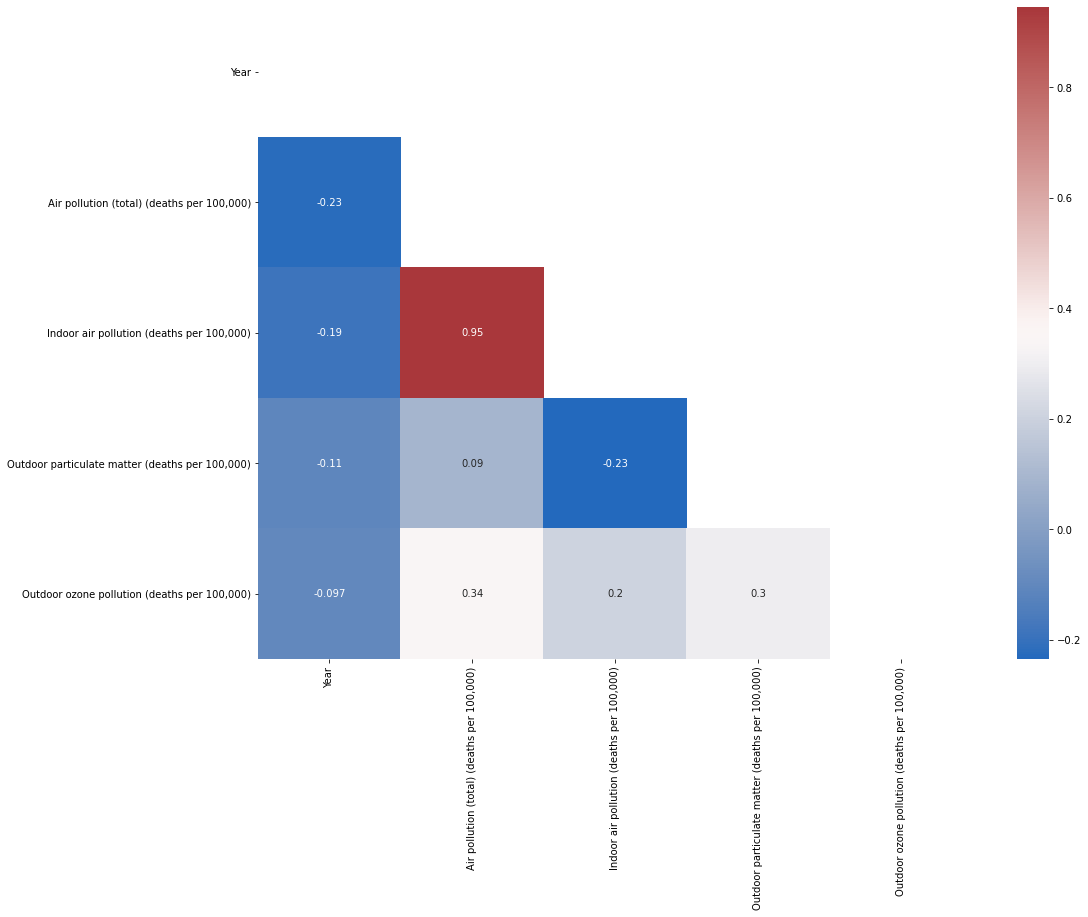

In [174]:
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(dat, dtype=bool))
sb.heatmap(dat, annot=True, cmap='vlag', mask=mask)
plt.show()

### For a better understanding of the analysis, histogram bar charts will be used.

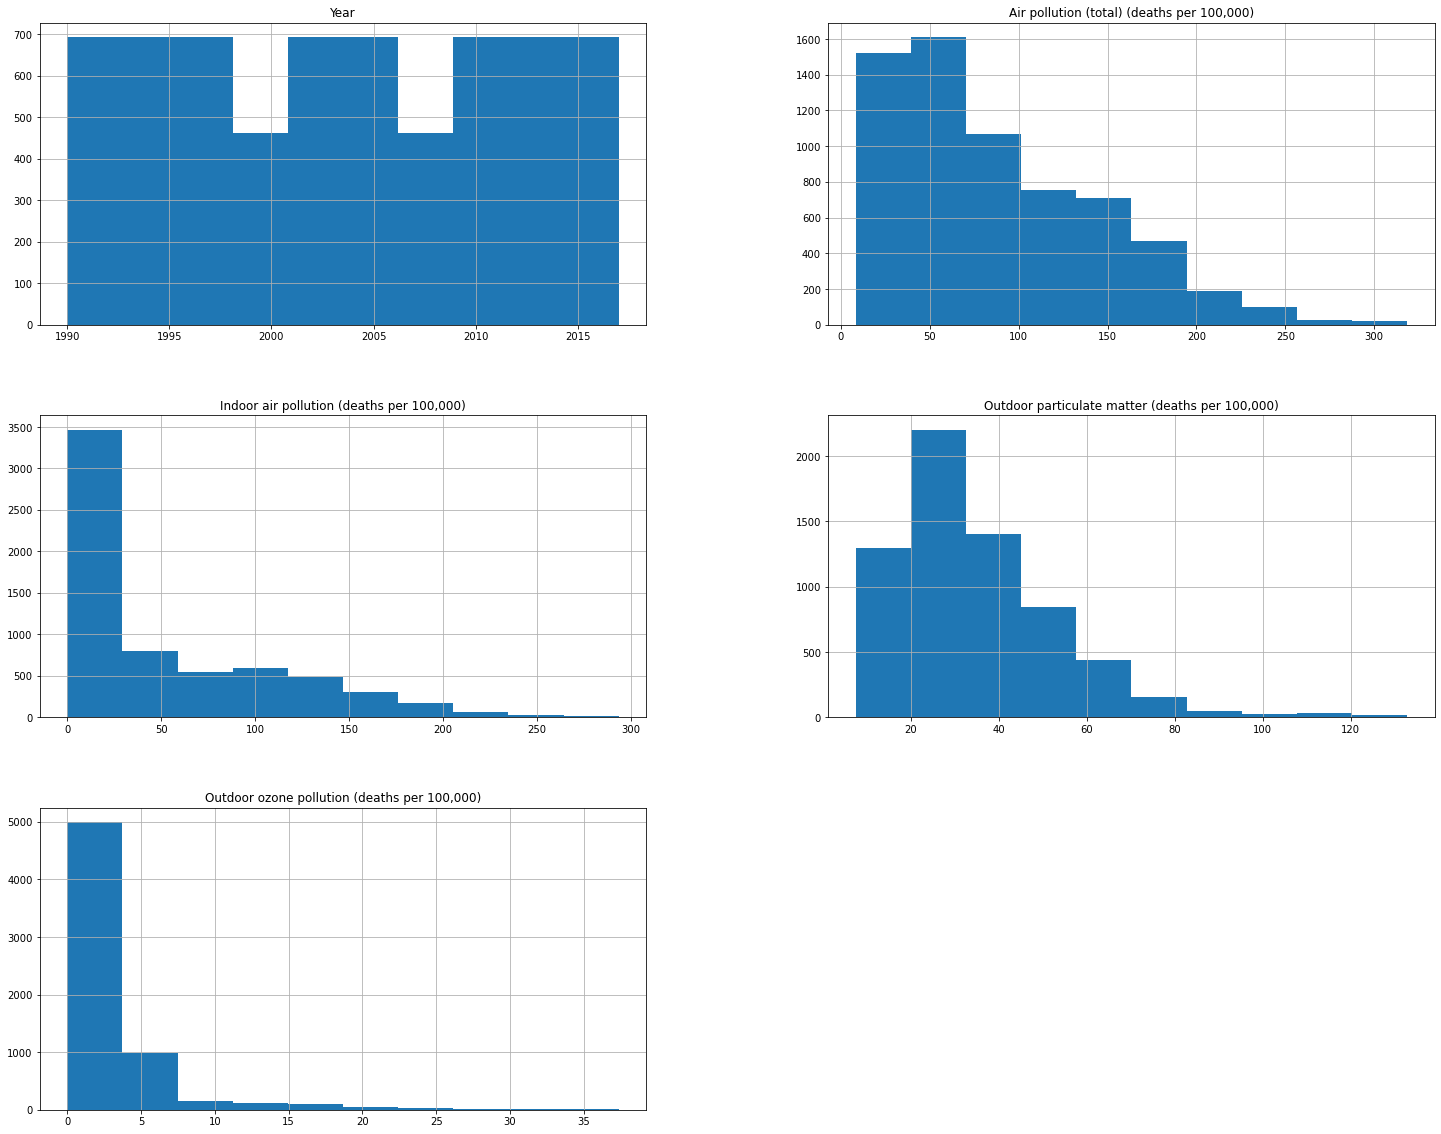

In [175]:
DeathData.hist(figsize=(25, 20))
plt.show()

###  Analysis on the death rate of some major countries.
### We will be analysing the following 5 countries:Australia,Brazil,Canada,China,India

## 1)Australia

In [176]:
# Gathering the information related to Australia
Aus = DeathData.iloc[308:336,0:]
Aus

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
308,Australia,AUS,1990,26.705027,0.692401,25.729829,0.328559
309,Australia,AUS,1991,25.915028,0.617207,25.020971,0.322292
310,Australia,AUS,1992,25.707455,0.559419,24.865989,0.328630
311,Australia,AUS,1993,24.635592,0.492049,23.866023,0.323296
312,Australia,AUS,1994,24.381848,0.445467,23.652686,0.330100
313,Australia,AUS,1995,23.100380,0.389572,22.431225,0.324473
314,Australia,AUS,1996,23.044652,0.358503,22.407071,0.324938
315,Australia,AUS,1997,22.430249,0.322222,21.838737,0.314184
316,Australia,AUS,1998,21.505290,0.283977,20.960276,0.304892
317,Australia,AUS,1999,20.409113,0.259009,19.897091,0.295335


In [177]:
#The correlation between all the data object for Australia
Aus_dat = Aus.corr()
Aus_dat

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
Year,1.000000,-0.990829,-0.917341,-0.992946,0.687359
"Air pollution (total) (deaths per 100,000)",-0.990829,1.000000,0.944330,0.999734,-0.595358
"Indoor air pollution (deaths per 100,000)",-0.917341,0.944330,1.000000,0.937551,-0.406368
"Outdoor particulate matter (deaths per 100,000)",-0.992946,0.999734,0.937551,1.000000,-0.612247
"Outdoor ozone pollution (deaths per 100,000)",0.687359,-0.595358,-0.406368,-0.612247,1.000000


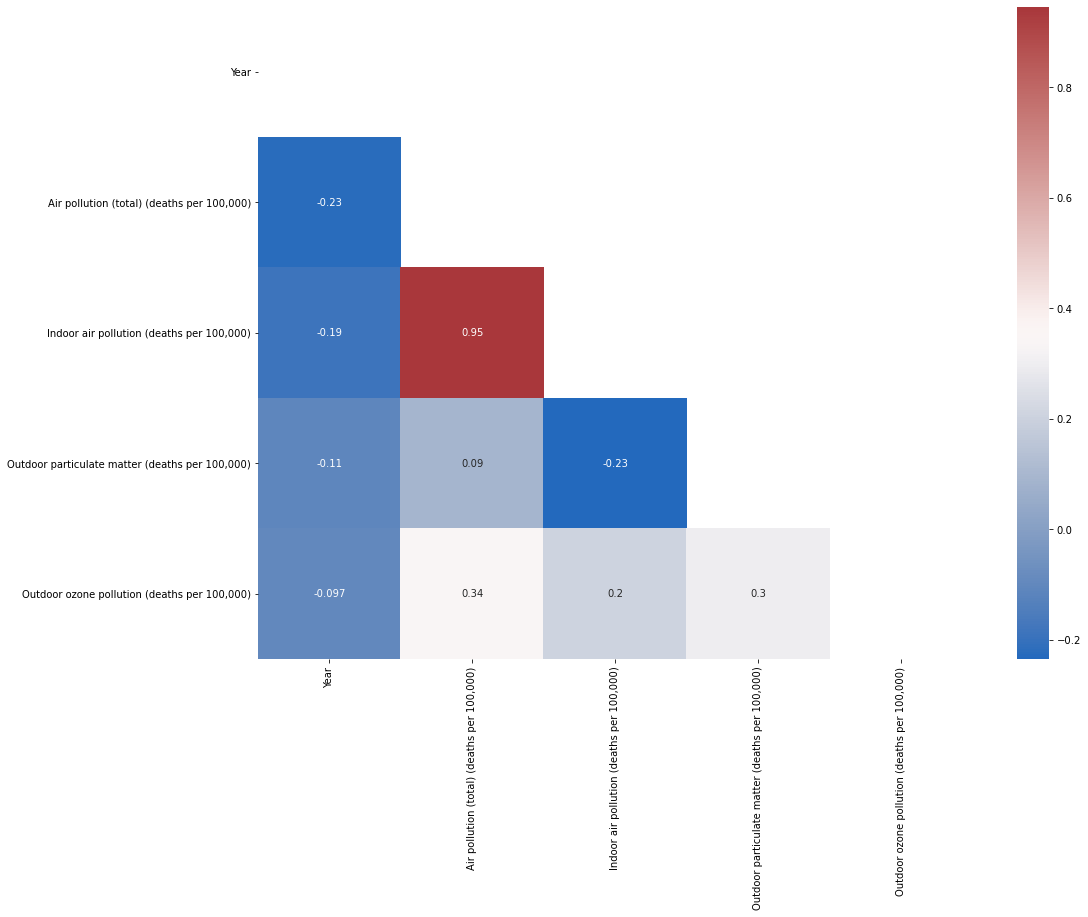

In [178]:
# Visualising the data through a heatmap
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(Aus_dat, dtype=bool))
sb.heatmap(dat, annot=True, cmap='vlag', mask=mask)
plt.show()

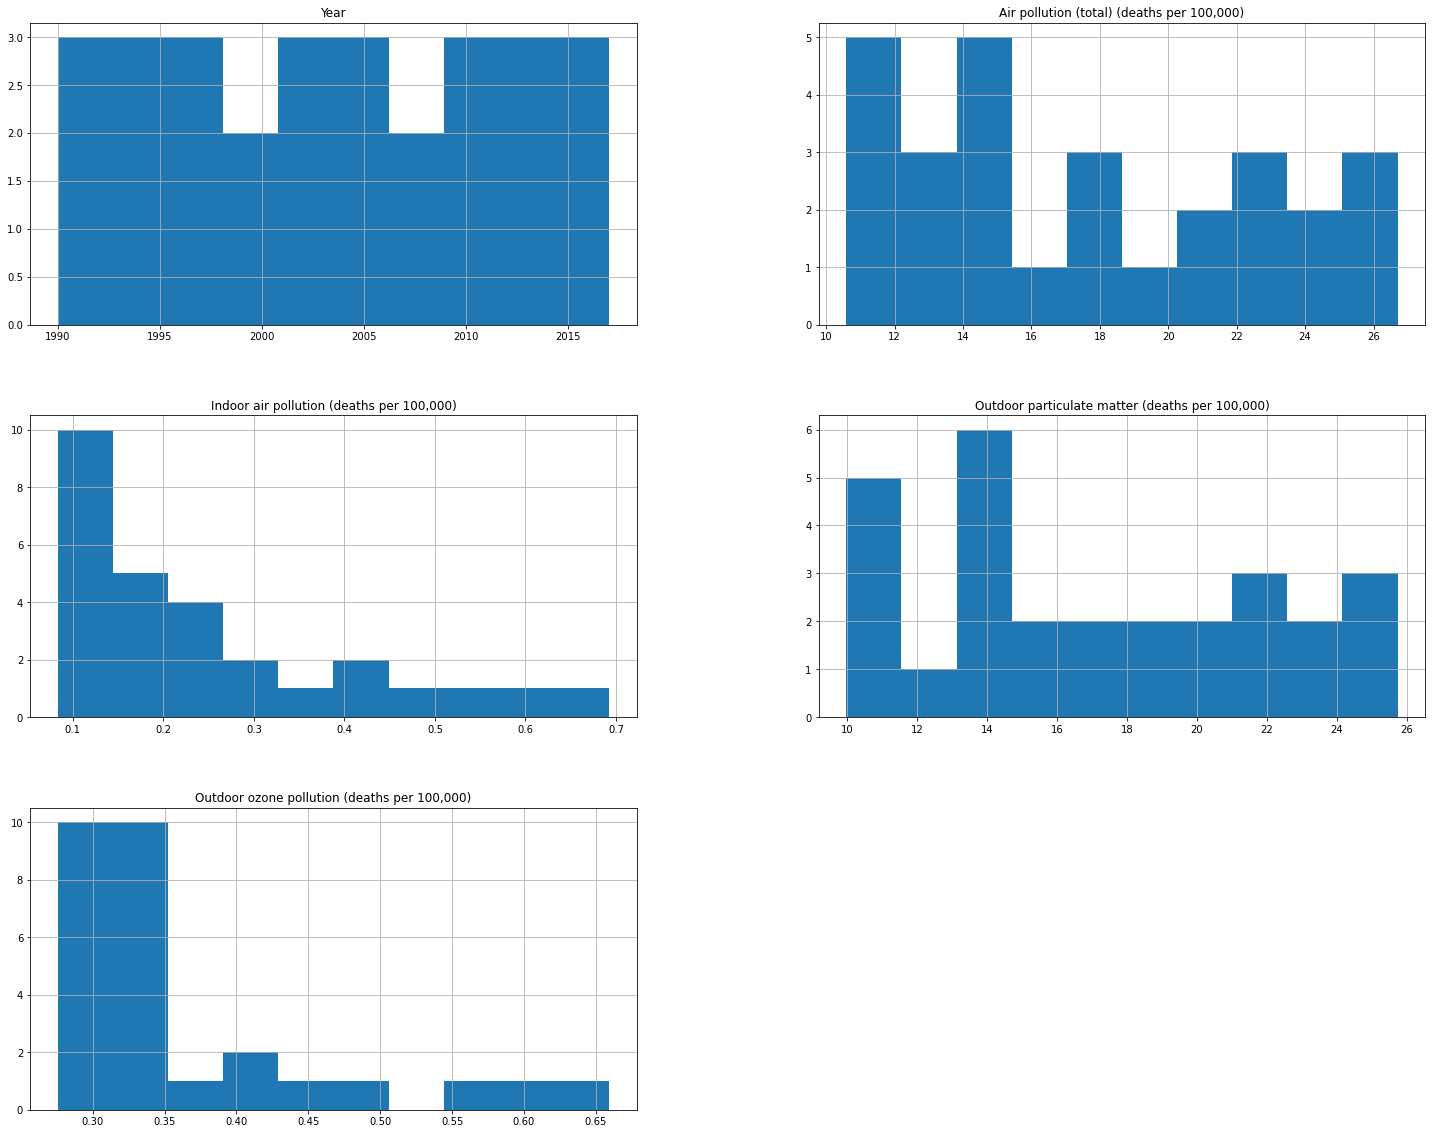

In [179]:
# Visualising the data through Histograms 
Aus.hist(figsize=(25, 20))
plt.show()

## 2)Brazil

In [180]:
# Gathering the information related to Brazil
Br = DeathData.iloc[756:782,0:]
Br

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
756,Brazil,BRA,1990,74.968204,44.089280,28.364595,3.330584
757,Brazil,BRA,1991,71.525047,41.129892,27.916528,3.272506
758,Brazil,BRA,1992,69.975939,39.072689,28.377367,3.321153
759,Brazil,BRA,1993,69.346437,37.346679,29.370634,3.439490
760,Brazil,BRA,1994,66.745798,34.608709,29.489863,3.445359
761,Brazil,BRA,1995,63.548592,31.670949,29.227215,3.430127
762,Brazil,BRA,1996,60.677568,28.998830,29.051506,3.388295
763,Brazil,BRA,1997,57.645886,26.463451,28.615177,3.300085
764,Brazil,BRA,1998,55.807986,24.578658,28.668245,3.280579
765,Brazil,BRA,1999,53.554869,22.573342,28.473998,3.199052


In [181]:
#The correlation between all the data object for Brazil
Br_dat = Br.corr()
Br_dat

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
Year,1.000000,-0.985258,-0.974369,-0.900437,-0.965514
"Air pollution (total) (deaths per 100,000)",-0.985258,1.000000,0.996918,0.867744,0.938205
"Indoor air pollution (deaths per 100,000)",-0.974369,0.996918,1.000000,0.826374,0.915038
"Outdoor particulate matter (deaths per 100,000)",-0.900437,0.867744,0.826374,1.000000,0.927665
"Outdoor ozone pollution (deaths per 100,000)",-0.965514,0.938205,0.915038,0.927665,1.000000


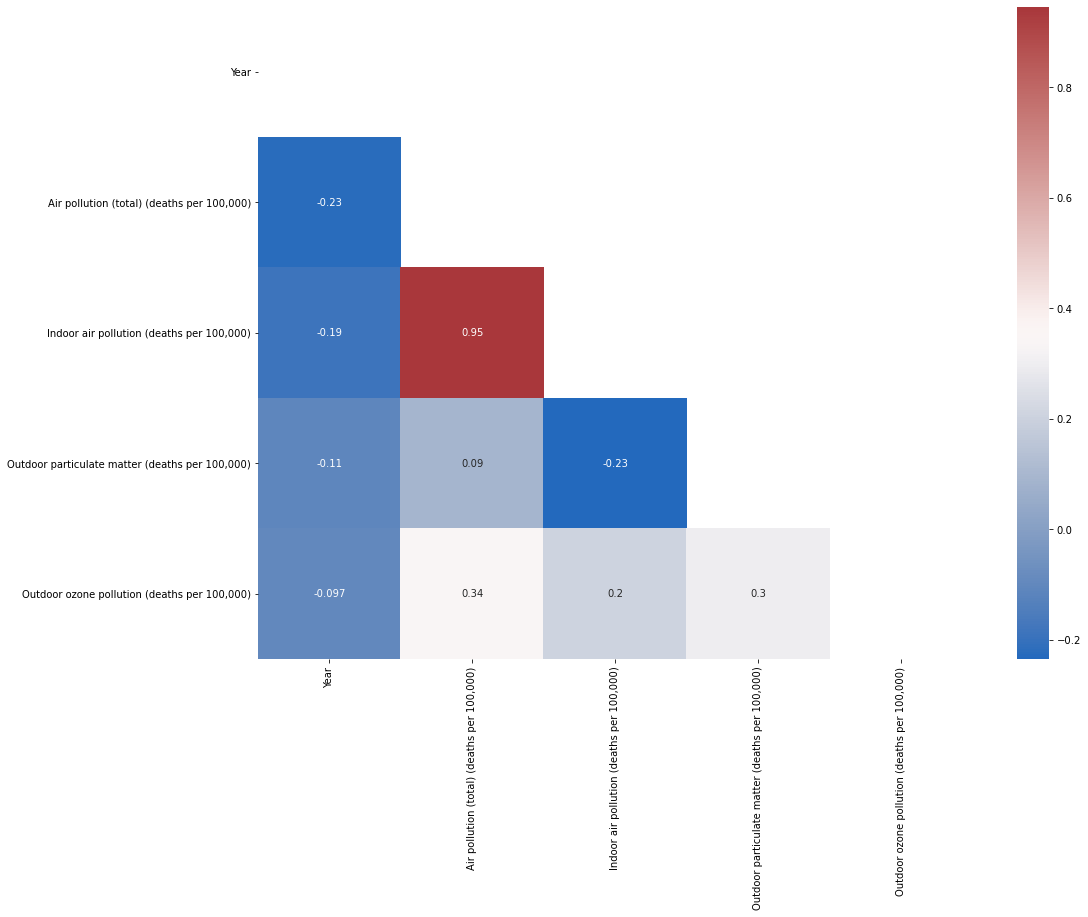

In [182]:
# Visualising the data through a heatmap
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(Br_dat, dtype=bool))
sb.heatmap(dat, annot=True, cmap='vlag', mask=mask)
plt.show()

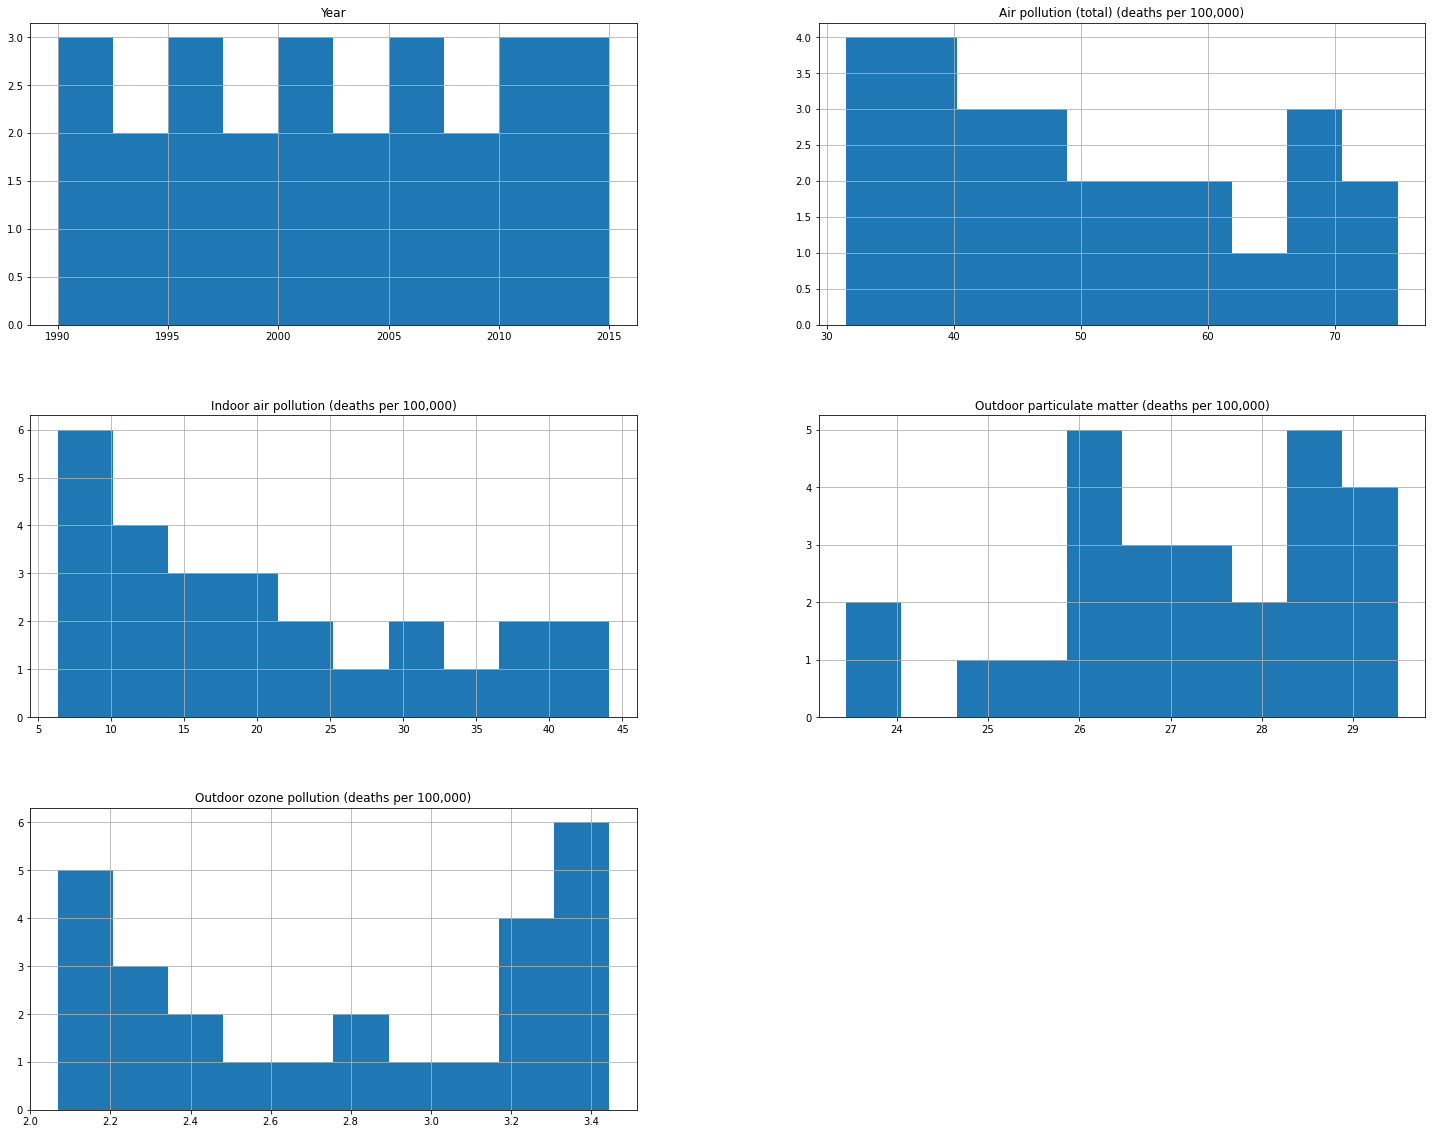

In [183]:
# Visualising the data through Histograms 
Br.hist(figsize=(25, 20))
plt.show()

## 3)Canada

In [184]:
# Gathering the information related to Canada
Ca = DeathData.iloc[952:980,0:]
Ca

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
952,Canada,CAN,1990,23.748444,0.146160,21.821096,2.024766
953,Canada,CAN,1991,23.340363,0.134791,21.405468,2.046623
954,Canada,CAN,1992,23.009471,0.124798,21.063923,2.069720
955,Canada,CAN,1993,23.032934,0.119108,21.034445,2.135114
956,Canada,CAN,1994,22.602876,0.110767,20.595466,2.152504
957,Canada,CAN,1995,22.325655,0.101595,20.288505,2.193303
958,Canada,CAN,1996,22.181013,0.094623,20.155243,2.192488
959,Canada,CAN,1997,21.927683,0.087754,19.908473,2.195940
960,Canada,CAN,1998,21.655377,0.082449,19.634838,2.205681
961,Canada,CAN,1999,21.177032,0.075128,19.179045,2.189426


In [185]:
#The correlation between all the data object for Canada
Ca_dat = Ca.corr()
Ca_dat

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
Year,1.000000,-0.989990,-0.960675,-0.990182,-0.885403
"Air pollution (total) (deaths per 100,000)",-0.989990,1.000000,0.914722,0.999886,0.923738
"Indoor air pollution (deaths per 100,000)",-0.960675,0.914722,1.000000,0.915065,0.769578
"Outdoor particulate matter (deaths per 100,000)",-0.990182,0.999886,0.915065,1.000000,0.918390
"Outdoor ozone pollution (deaths per 100,000)",-0.885403,0.923738,0.769578,0.918390,1.000000


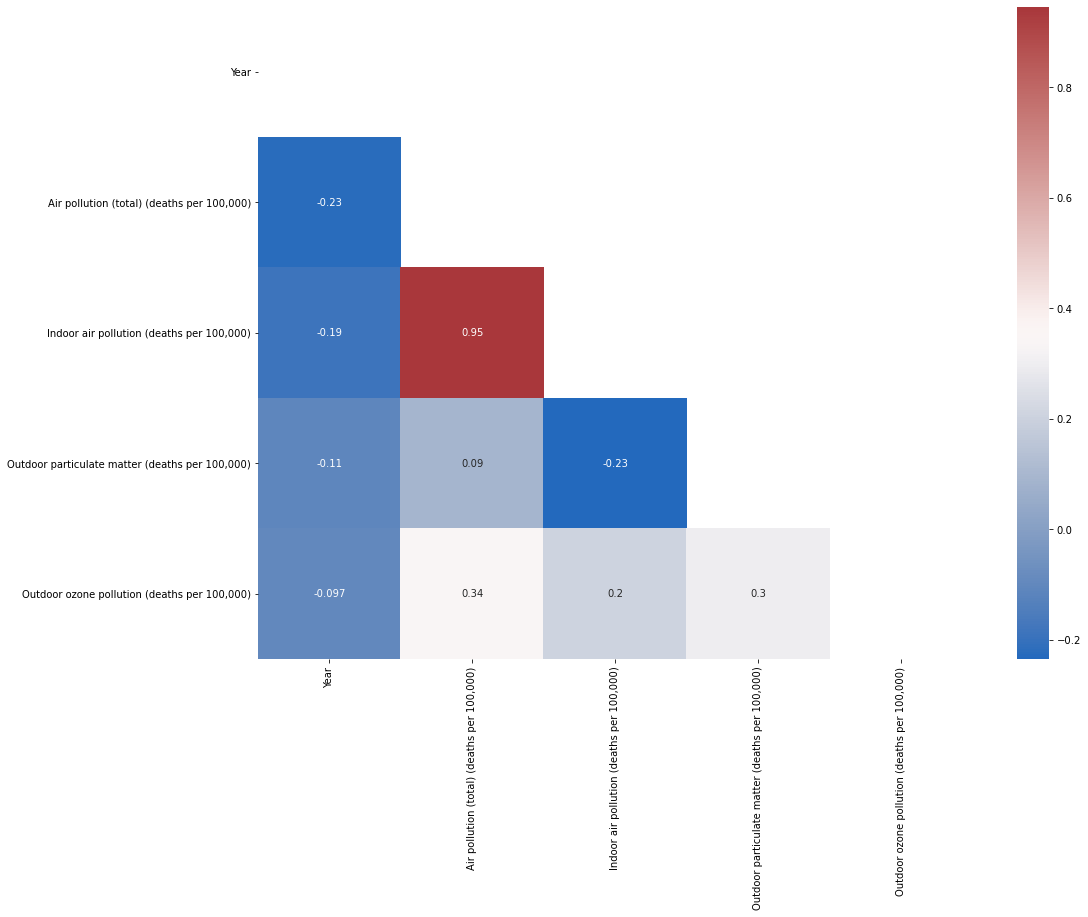

In [186]:
# Visualising the data through a heatmap
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(Ca_dat, dtype=bool))
sb.heatmap(dat, annot=True, cmap='vlag', mask=mask)
plt.show()

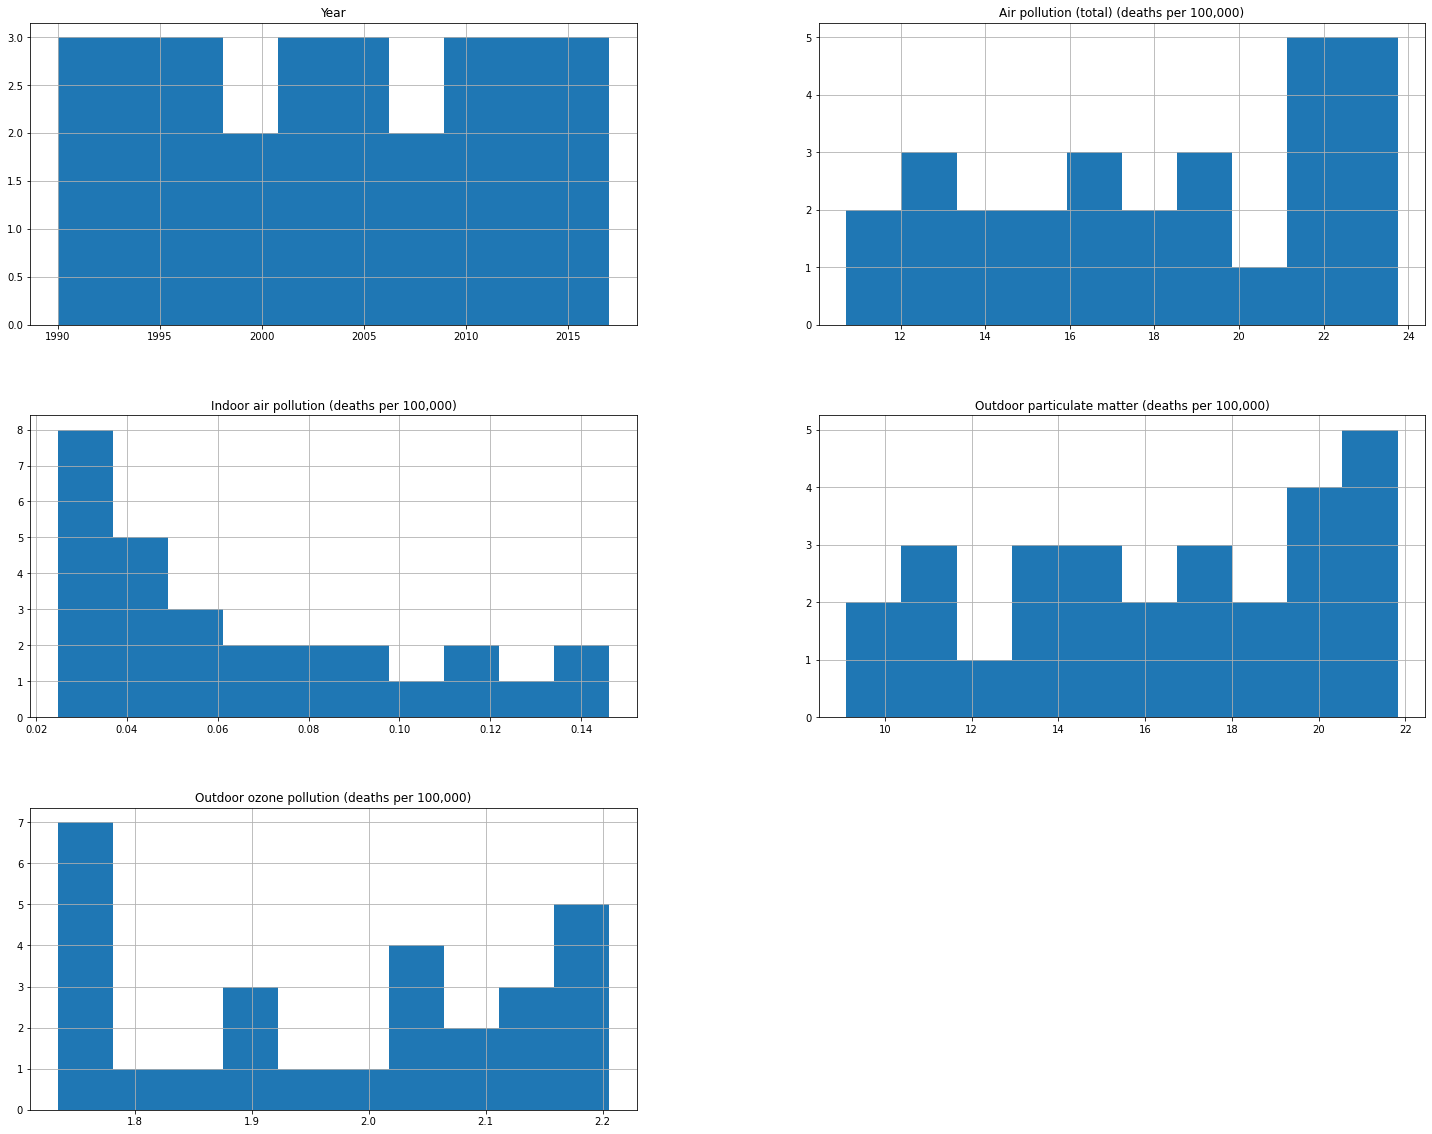

In [187]:
# Visualising the data through Histograms 
Ca.hist(figsize=(25, 20))
plt.show()

## 4)China

In [188]:
# Gathering the information related to China
Chi = DeathData.iloc[1260:1288,0:]
Chi

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
1260,China,CHN,1990,184.413204,107.967663,56.106721,35.265966
1261,China,CHN,1991,181.800704,103.758038,57.732571,34.930074
1262,China,CHN,1992,177.283467,98.861685,58.397798,34.199468
1263,China,CHN,1993,172.267088,93.711195,58.860013,33.425545
1264,China,CHN,1994,167.082939,88.671630,59.080009,32.602204
1265,China,CHN,1995,160.713956,82.992069,59.032781,31.297066
1266,China,CHN,1996,155.385795,77.688835,59.584994,30.140656
1267,China,CHN,1997,149.683422,72.530772,59.698543,28.884138
1268,China,CHN,1998,144.841620,68.039764,59.918036,27.798060
1269,China,CHN,1999,138.201733,63.112879,59.137990,26.138824


In [189]:
#The correlation between all the data object for China
Chi_dat = Chi.corr()
Chi_dat

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
Year,1.000000,-0.991469,-0.980372,-0.673902,-0.988586
"Air pollution (total) (deaths per 100,000)",-0.991469,1.000000,0.996434,0.606355,0.997936
"Indoor air pollution (deaths per 100,000)",-0.980372,0.996434,1.000000,0.538199,0.994160
"Outdoor particulate matter (deaths per 100,000)",-0.673902,0.606355,0.538199,1.000000,0.597948
"Outdoor ozone pollution (deaths per 100,000)",-0.988586,0.997936,0.994160,0.597948,1.000000


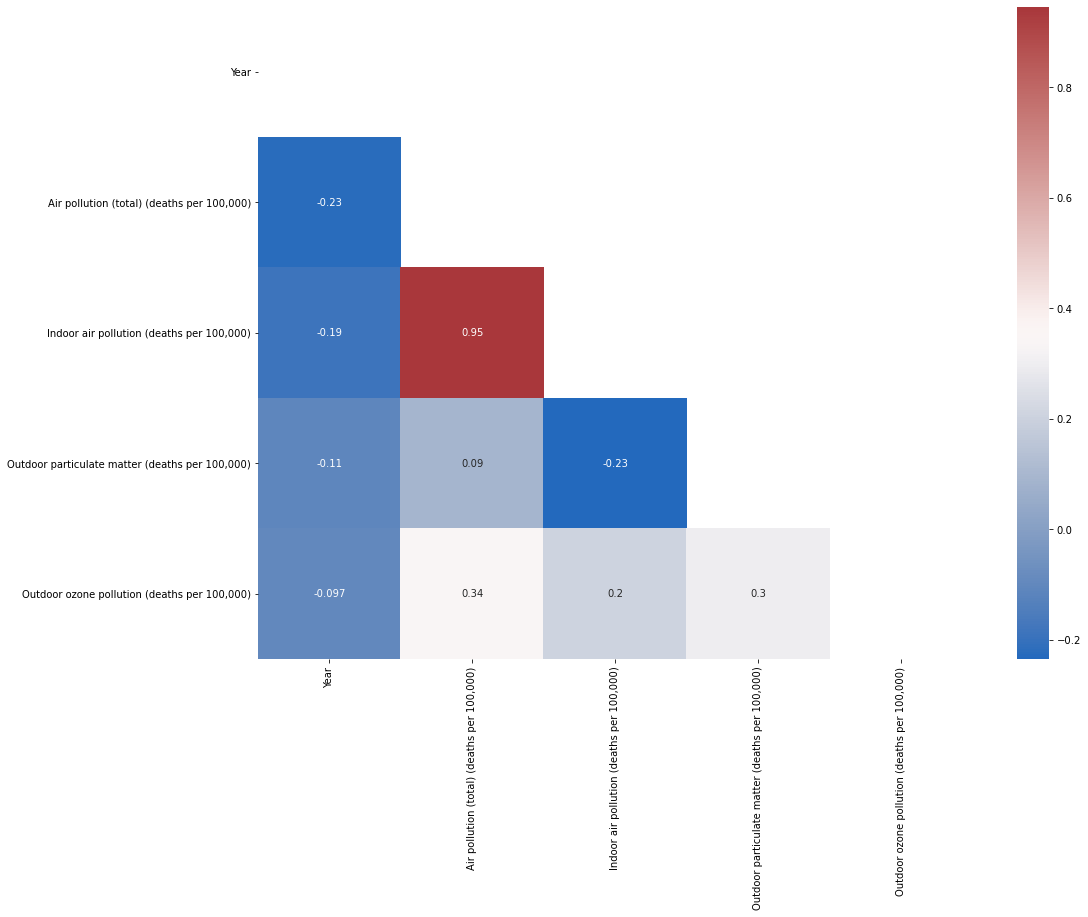

In [190]:
# Visualising the data through a heatmap
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(Chi_dat, dtype=bool))
sb.heatmap(dat, annot=True, cmap='vlag', mask=mask)
plt.show()

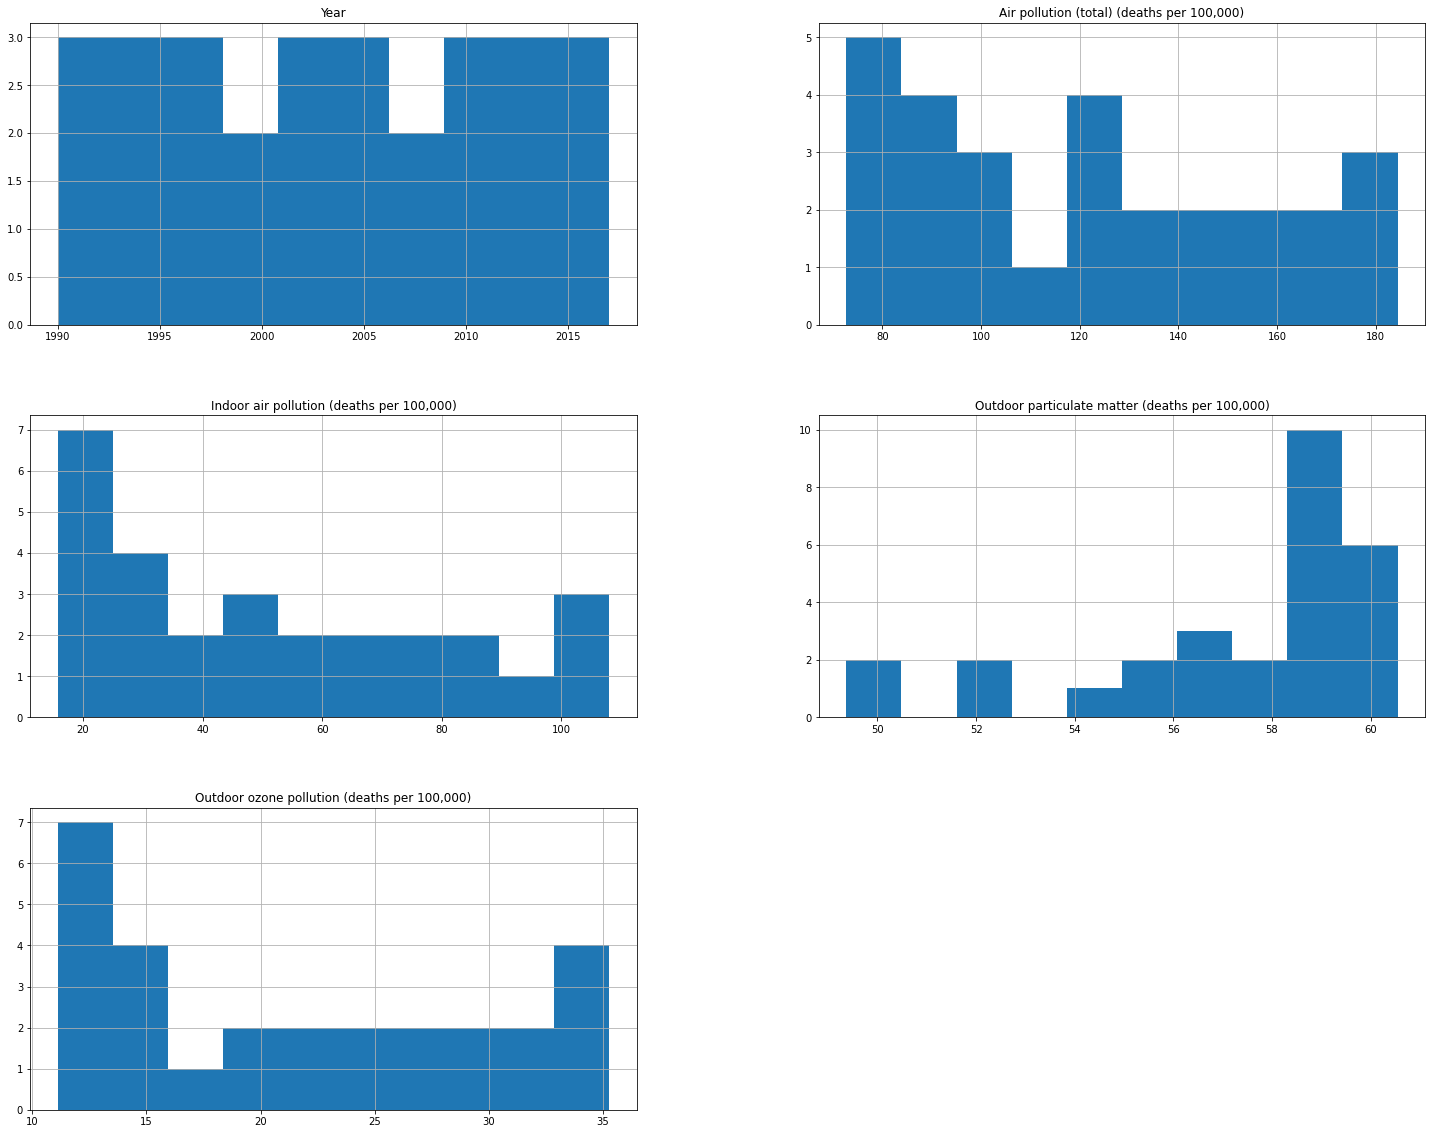

In [191]:
# Visualising the data through Histograms 
Chi.hist(figsize=(25, 20))
plt.show()

## 5)India

In [192]:
# Gathering the information related to India
Ind = DeathData.iloc[2660:2688,0:]
Ind

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
2660,India,IND,1990,211.376738,140.873078,57.500137,25.479616
2661,India,IND,1991,209.538102,138.362456,58.194474,25.352090
2662,India,IND,1992,207.462594,135.459209,59.060688,25.139187
2663,India,IND,1993,201.139283,129.963198,58.528327,24.448590
2664,India,IND,1994,195.991024,125.203988,58.334058,23.949792
2665,India,IND,1995,190.722434,120.460240,57.998226,23.450432
2666,India,IND,1996,187.942662,116.974217,58.729165,23.234831
2667,India,IND,1997,191.942354,118.414786,60.901716,23.862899
2668,India,IND,1998,189.491894,115.778669,61.086733,23.785558
2669,India,IND,1999,180.311804,108.707434,59.539222,22.608552


In [193]:
#The correlation between all the data object for India
Ind_dat = Ind.corr()
Ind_dat

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
Year,1.000000,-0.975130,-0.991640,0.904573,-0.948617
"Air pollution (total) (deaths per 100,000)",-0.975130,1.000000,0.995284,-0.792310,0.990383
"Indoor air pollution (deaths per 100,000)",-0.991640,0.995284,1.000000,-0.847458,0.978011
"Outdoor particulate matter (deaths per 100,000)",0.904573,-0.792310,-0.847458,1.000000,-0.743392
"Outdoor ozone pollution (deaths per 100,000)",-0.948617,0.990383,0.978011,-0.743392,1.000000


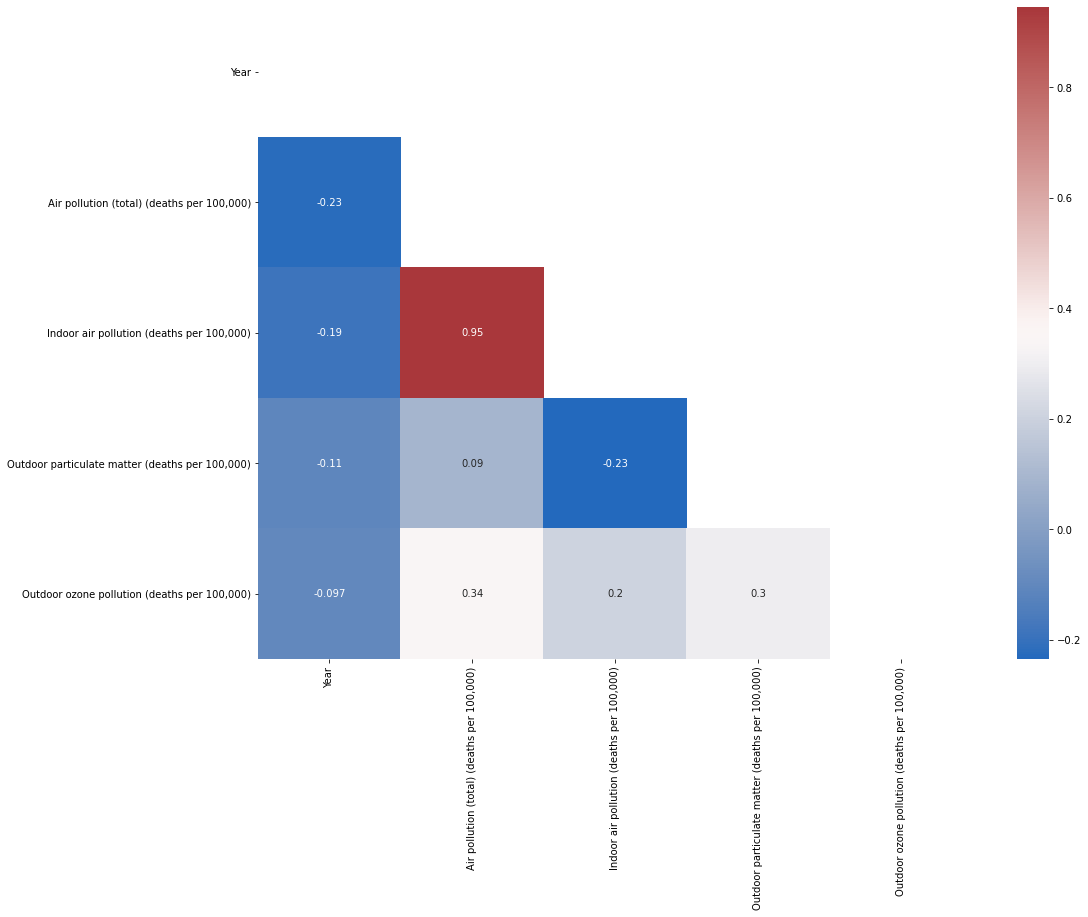

In [194]:
# Visualising the data through a heatmap
plt.figure(figsize = (16,12))
mask = np.triu(np.ones_like(Ind_dat, dtype=bool))
sb.heatmap(dat, annot=True, cmap='vlag', mask=mask)
plt.show()

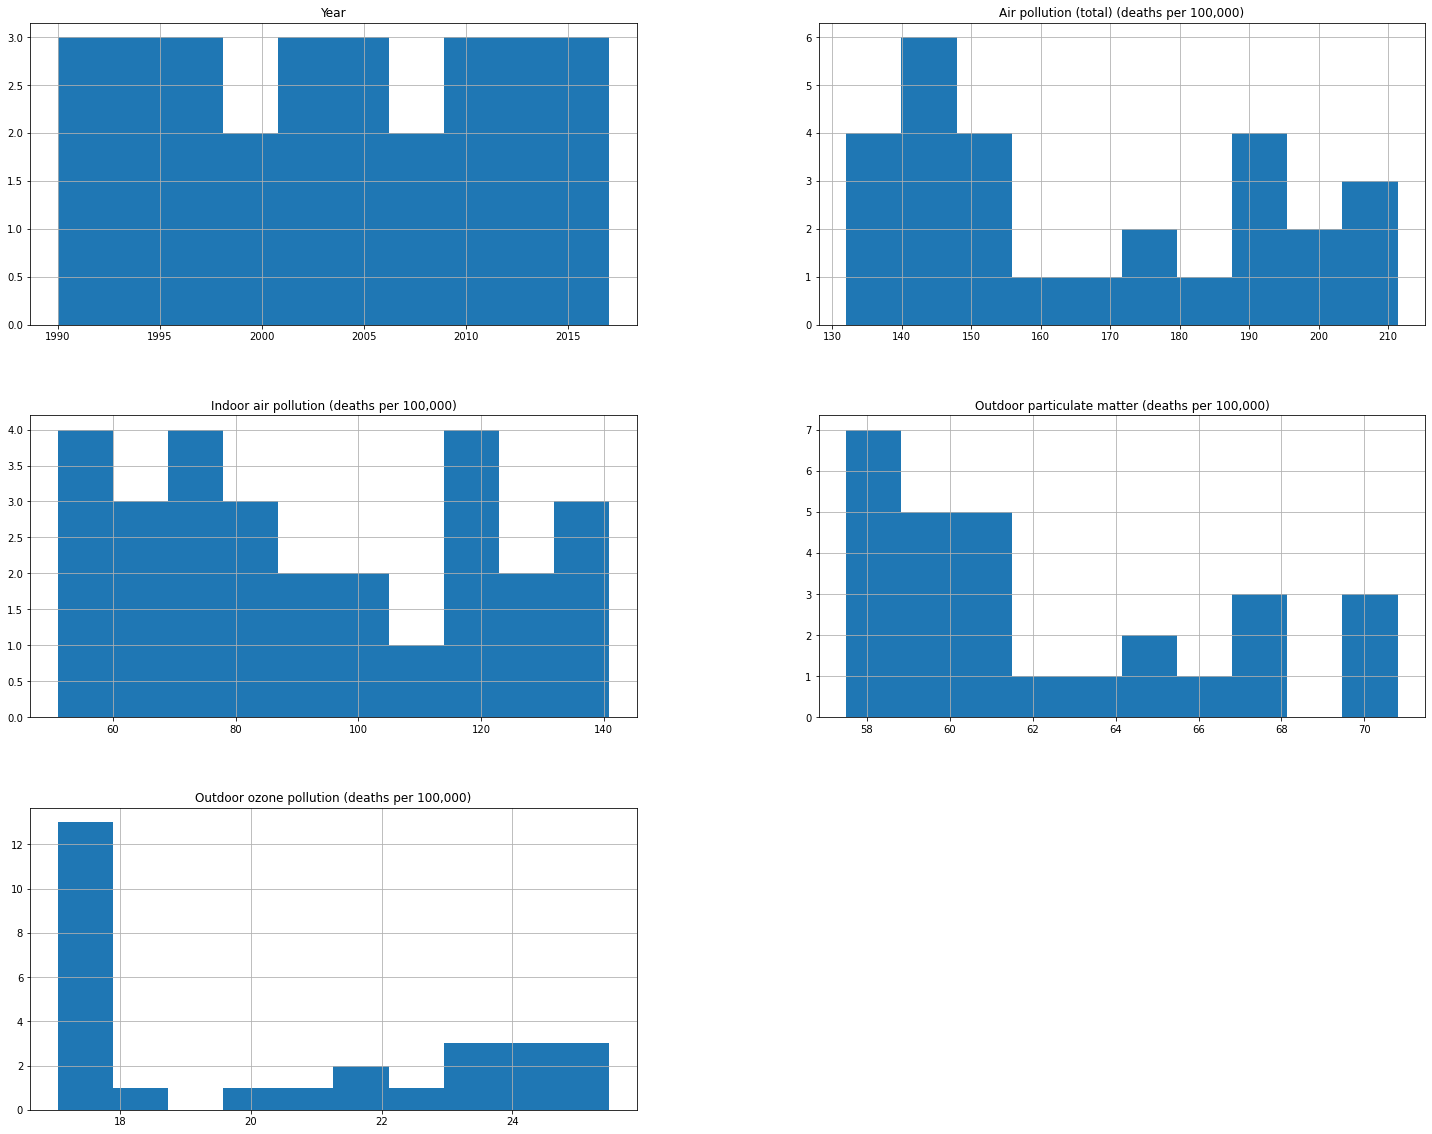

In [195]:
# Visualising the data through Histograms 
Ind.hist(figsize=(25, 20))
plt.show()

## For a better understanding of the analysis, a pie chart is used.

### Death rate caused by air pollution(overall)

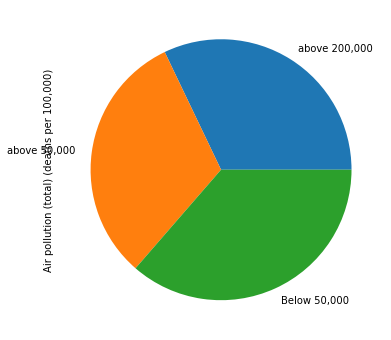

In [196]:
Rating = pd.Series(6 * np.random.rand(3), index=["above 200,000 ", "above 50,000 ", "Below 50,000"], name="Air pollution (total) (deaths per 100,000)")

Rating.plot.pie(figsize=(6, 6));

### Overall death rate caused by indoor air pollution

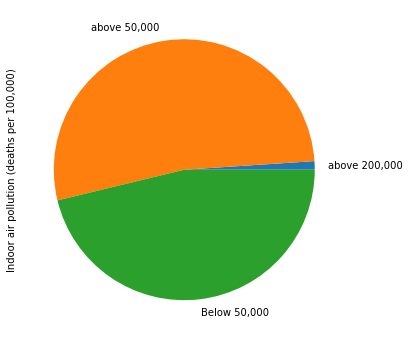

In [197]:
IndoorRating = pd.Series(6 * np.random.rand(3), index=["above 200,000 ", "above 50,000 ", "Below 50,000"], name="Indoor air pollution (deaths per 100,000)")

IndoorRating.plot.pie(figsize=(6, 6));

### Overall death rate caused by outdoor particulate matter

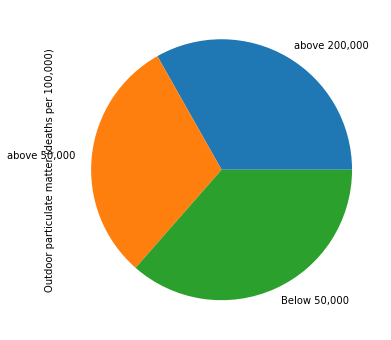

In [198]:
OutdoorRating = pd.Series(6 * np.random.rand(3), index=["above 200,000 ", "above 50,000 ", "Below 50,000"], name="Outdoor particulate matter (deaths per 100,000)")

OutdoorRating.plot.pie(figsize=(6, 6));

### Overall death rate caused by ozone outdoor pollution

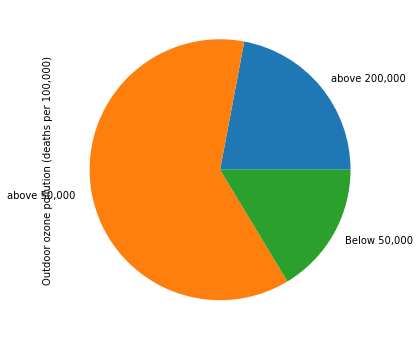

In [199]:
OzoneRating = pd.Series(6 * np.random.rand(3), index=["above 200,000 ", "above 50,000 ", "Below 50,000"], name="Outdoor ozone pollution (deaths per 100,000)")

OzoneRating.plot.pie(figsize=(6, 6));

### Overall Death rate over the period of years

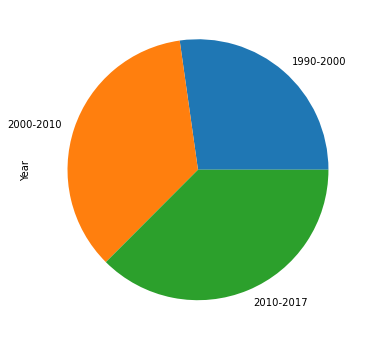

In [200]:
DeathYears = pd.Series(8 * np.random.rand(3), index=["1990-2000", "2000-2010", "2010-2017"], name="Year")

DeathYears.plot.pie(figsize=(6, 6));

### D2.Webscraping Analysis

In [201]:
url1 = 'https://gahp.net/pollution-and-health-metrics/'

In [202]:
headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36' Gecko) Chrome/102.0.0.0 Safari/537.36"
}

In [203]:
res1 = requests.get(url1,{'headers':headers})

In [204]:
webData1 = bs4.BeautifulSoup(res1.text,'html.parser')

In [205]:
webData1.find_all()

[<html lang="en-US">
 <head>
 <!-- set the encoding of your site -->
 <meta charset="utf-8"/>
 <!-- set the viewport width and initial-scale on mobile devices -->
 <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
 <script type="text/javascript">
 		var pathInfo = {
 			base: 'https://gahp.net/wp-content/themes/gahpwebsite/',
 			css: 'css/',
 			js: 'js/',
 			swf: 'swf/',
 		}
 	</script>
 <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
 <!-- This site is optimized with the Yoast SEO Premium plugin v18.4 (Yoast SEO v18.7) - https://yoast.com/wordpress/plugins/seo/ -->
 <title>Pollution and Health Metrics: Pollution by country data and rankings</title>
 <meta content="Report ranks pollution deaths on global, regional and pollution by country level. US among Top 10 countries with highest pollution-related deaths." name="description">
 <link href="https://gahp.net/pollution-and-health-metrics/" rel="canoni

In [206]:
table = webData1.find('table')
table

<table>
<tbody>
<tr>
<td> </td>
<td>Total Annual Premature Pollution-Related Deaths</td>
<td> </td>
</tr>
<tr>
<td><strong>1</strong></td>
<td> India</td>
<td>2,326,771</td>
</tr>
<tr>
<td><strong>2</strong></td>
<td> China</td>
<td>1,865,566</td>
</tr>
<tr>
<td><strong>3</strong></td>
<td> Nigeria</td>
<td>279,318</td>
</tr>
<tr>
<td><strong>4</strong></td>
<td> Indonesia</td>
<td>232,974</td>
</tr>
<tr>
<td><strong>5</strong></td>
<td> Pakistan</td>
<td>223,836</td>
</tr>
<tr>
<td><strong>6</strong></td>
<td> Bangladesh</td>
<td>207,922</td>
</tr>
<tr>
<td><strong>7</strong></td>
<td> United States of America </td>
<td>196,930</td>
</tr>
<tr>
<td><strong>8</strong></td>
<td> Russian Federation</td>
<td>118,687</td>
</tr>
<tr>
<td><strong>9</strong></td>
<td> Ethiopia</td>
<td>110,787</td>
</tr>
<tr>
<td><strong>10</strong></td>
<td> Brazil</td>
<td>109,438</td>
</tr>
</tbody>
</table>

In [207]:
def tableDataText(table):       
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')] # header row
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append([td.get_text(strip=True) for td in tr.find_all('td')]) # data row
    return rows

In [208]:
list_table = tableDataText(table)
list_table[0:]

[['', 'Total Annual Premature Pollution-Related Deaths', ''],
 ['1', 'India', '2,326,771'],
 ['2', 'China', '1,865,566'],
 ['3', 'Nigeria', '279,318'],
 ['4', 'Indonesia', '232,974'],
 ['5', 'Pakistan', '223,836'],
 ['6', 'Bangladesh', '207,922'],
 ['7', 'United States of America', '196,930'],
 ['8', 'Russian Federation', '118,687'],
 ['9', 'Ethiopia', '110,787'],
 ['10', 'Brazil', '109,438']]

In [209]:
dftable = pd.DataFrame(list_table[1:], columns=list_table[0])
dftable.head(400)

,,Total Annual Premature Pollution-Related Deaths,
0,1,India,"2,326,771"
1,2,China,"1,865,566"
2,3,Nigeria,"279,318"
3,4,Indonesia,"232,974"
4,5,Pakistan,"223,836"
5,6,Bangladesh,"207,922"
6,7,United States of America,"196,930"
7,8,Russian Federation,"118,687"
8,9,Ethiopia,"110,787"
9,10,Brazil,"109,438"


### E.Ethical Usage

<p>Death due to air pollution is a dataset available for public in kaggle and it is used for data analysis.This dataset is available to the public for analysis, research, and other purposes.Since it is accessible to everyone and may be used for many analysis, it will generate a lot of fresh data. Since it originated from publicly available data, freshly created data does not necessarily need to be intellectual property, but the person who created it has every right to do so based on the process used to create it.</p>

<p>Since Wikipedia has the biggest public demand for any type of knowledge and its content is quite accurate, we can compare the data from that website or any other authorized websites also. In order to better comprehend our data, we can compare it to the data on that website and see if there are any discrepancies. Regardless of the purposes for which the data on the website is used, anyone can use it,This data has been collected by WHO(World Health Organization)by taking all the criteria into consideration.

### F. Bibliography

<p> I have taken reference from the following websites:</p>
        <li>https://ourworldindata.org/data-review-air-pollution-deaths#:~:text=The%20WHO%20estimates%20that%3A,all%20sources%20of%20air%20pollution. </li>
        <li>https://pandas.pydata.org/docs/reference/api/pandas.set_option.html?highlight=set_option#pandas.set_option </li>
        <li>https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#min-tut-03-subset </li>
        <li>https://beautiful-soup-4.readthedocs.io/en/latest/</li>
        <li>https://seaborn.pydata.org/generated/seaborn.kdeplot.html</li>
        <li> https://www.kaggle.com/datasets/akshat0giri/death-due-to-air-pollution-19902017/metadata</li><li>https://www.niehs.nih.gov/research/programs/geh/geh_newsletter/2014/4/articles/air_pollution_accounts_for_1_in_8_deaths_worldwide_according_to_new_who_estimates.cfm</li>

### G. Summary

<p>We analysed the death rate due to air pollution in some of the 5 major countries in the world.With these statistics and analysis we can come to conclude the following:
    <ul>
        <li>India has most number of death rates over the period of years</li>
        <li>After India,China stands second having most number of death rate</li>
        <li>The year 2010 onwards the death rate has a steep rise</li>
      </ul>  
        <p>From the analysis done using the pie chart,We can conclude the following:</p>
         <li>The overall death rate caused by air pollution is mostly above 50,000 over the period 1990-2017 </li>
         <li>The death rate caused by indoor air pollution is mostly above 50,000 over the period 1990-2017 </li>
         <li>The death rate caused by outdoor particulate matter is mostly above  200,000 over the period 1990-2017 </li>
          <li>The death rate caused by outdoor ozone pollution is mostly below 50,000 over the period 1990-2017 </li>
            <li>The death rate is the highest during 2010-2017 over the period. </li>

In [210]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.
